In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Load Data

In [2]:
movies = pd.read_csv('movies.csv')
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
tags = pd.read_csv('tags.csv')
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [4]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


# Data statistics

In [5]:
ratings['rating'].std()

1.051988919275684

In [6]:
ratings['rating'].mean()

3.5255285642993797

In [7]:
ratings.corr()

,userId,movieId,rating,timestamp
userId,1.000000,-0.000850,0.001175,-0.003101
movieId,-0.000850,1.000000,0.002606,0.459096
rating,0.001175,0.002606,1.000000,-0.000512
timestamp,-0.003101,0.459096,-0.000512,1.000000


# Data Cleaning

In [8]:
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [9]:
ratings.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

In [10]:
tags.isnull().any()

userId       False
movieId      False
tag           True
timestamp    False
dtype: bool

tags have null data.

In [11]:
tags=tags.dropna()

In [12]:
tags.isnull().any()

userId       False
movieId      False
tag          False
timestamp    False
dtype: bool

Null data has been removed.

# Data Exploration

In [13]:
data = pd.merge(pd.merge(ratings, tags), movies)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 0 to 68
Data columns (total 7 columns):
userId       69 non-null int64
movieId      69 non-null int64
rating       69 non-null float64
timestamp    69 non-null int64
tag          69 non-null object
title        69 non-null object
genres       69 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 4.3+ KB


In [14]:
data.head()

,userId,movieId,rating,timestamp,tag,title,genres
0,631,55052,4.0,1359152336,Keira Knightley,Atonement (2007),Drama|Romance|War
1,1741,8949,3.5,1189037451,adapted from:book,Sideways (2004),Comedy|Drama|Romance
2,1741,8949,3.5,1189037451,wedding,Sideways (2004),Comedy|Drama|Romance
3,4450,102792,3.0,1397446775,emotional,"Broken Circle Breakdown, The (2012)",Drama
4,6988,6188,2.0,1254016287,not funny,Old School (2003),Comedy


In [15]:
most_rated = data.groupby('title').size().sort_values(ascending=False)[:5]
print(most_rated)



title
House of the Dead, The (2003)    5
Song of the South (1946)         4
Running Man, The (1987)          2
Sideways (2004)                  2
My Girl (1991)                   2
dtype: int64


Most rated movies

sci-fi                3384
based on a book       3281
atmospheric           2917
comedy                2779
action                2657
surreal               2427
BD-R                  2334
twist ending          2323
funny                 2072
dystopia              1991
stylized              1941
quirky                1906
dark comedy           1899
classic               1769
psychology            1754
fantasy               1703
time travel           1549
romance               1534
visually appealing    1509
disturbing            1487
Name: tag, dtype: int64


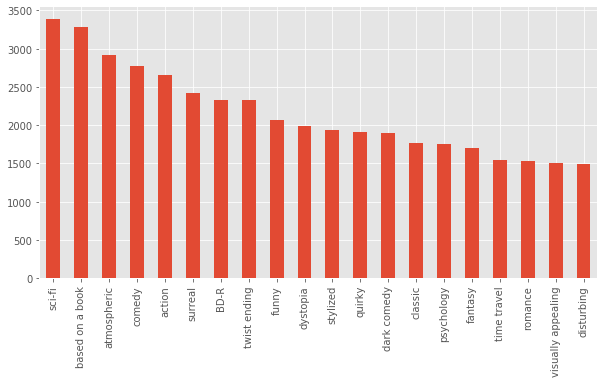

In [16]:
tag_counts = tags['tag'].value_counts()
print(tag_counts[:20])
tag_counts[:20].plot(kind='bar', figsize=(10,5))

Key words ordered in tags.

In [17]:
# Split title and release year in separate columns in movies dataframe. 
movies['year'] = movies.title.str.extract("\((\d{4})\)", expand=True)
movies.title = movies.title.str[:-7]

# Categorize movies genres properly. Working later with +20MM rows of strings proved very resource consuming
genres_unique = pd.DataFrame(movies.genres.str.split('|').tolist()).stack().unique()
genres_unique = pd.DataFrame(genres_unique, columns=['genre']) 
genres_unique


movies_year = movies.join(movies.genres.str.get_dummies().astype(bool))
movies_year.drop('genres', inplace=True, axis=1)

one_hot = movies.genres.str.get_dummies()
movies = movies.join(one_hot)
movies.drop('genres', inplace=True, axis=1)
movies.head()

,movieId,title,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1995,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji,1995,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,1995,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale,1995,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II,1995,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
movies.dropna(inplace=True)
ratings.dropna(inplace=True)

In [19]:
genres_unique.genre

0              Adventure
1              Animation
2               Children
3                 Comedy
4                Fantasy
5                Romance
6                  Drama
7                 Action
8                  Crime
9               Thriller
10                Horror
11               Mystery
12                Sci-Fi
13                  IMAX
14           Documentary
15                   War
16               Musical
17               Western
18             Film-Noir
19    (no genres listed)
Name: genre, dtype: object

<Figure size 720x360 with 0 Axes>

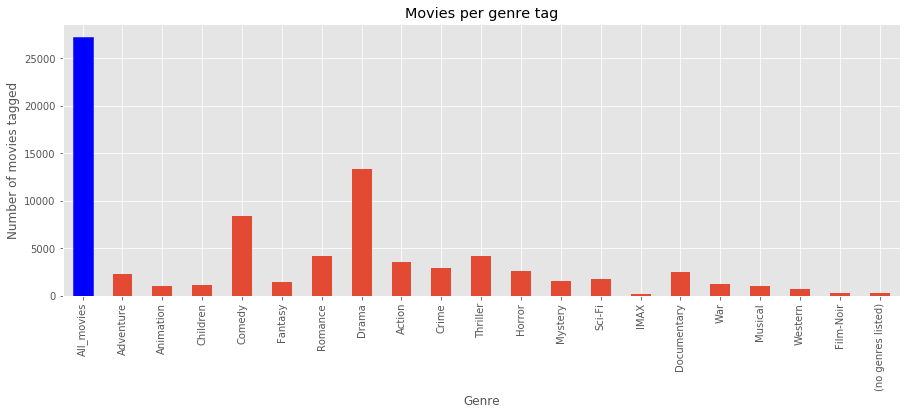

In [23]:


plt.figure(figsize=(10,5))
dftmp = movies_year[['movieId', 'year']].groupby('year')
df = pd.DataFrame({'All_movies' : dftmp.movieId.nunique().cumsum()})
# Plot histogram for each individual genre
for genre in genres_unique.genre:
    dftmp = movies_year[movies_year[genre]][['movieId', 'year']].groupby('year')
    df[genre]=dftmp.movieId.nunique().cumsum()
df.fillna(method='ffill', inplace=True)

# Plot simple scatter of the number of movies tagged with each genre
plt.figure(figsize=(15,5))
barlist = df.iloc[-1].plot.bar()
barlist.patches[0].set_color('b') # Color 'All_movies' differently, as it's not a genre tag count
plt.xticks(rotation='vertical')
plt.title('Movies per genre tag')
plt.xlabel('Genre')
plt.ylabel('Number of movies tagged')
plt.show()

/Users/xurui1993/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:2410: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(data[col].dropna().values, bins=bins, **kwds)


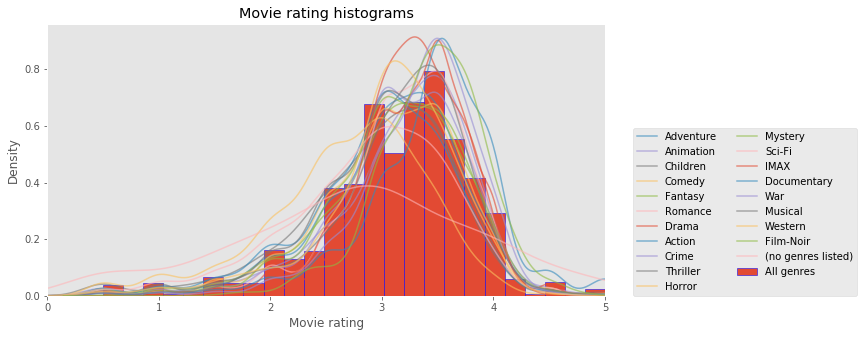

In [22]:

dftmp = ratings[['movieId','rating']].groupby('movieId').mean()


rating_stats = []
# Plot general histogram of all ratings
dftmp.hist(bins=25, grid=False, edgecolor='b', normed=True, label ='All genres', figsize=(10,5))
# Plot histograms (kde lines for better visibility) per genre
for genre in genres_unique.genre:
    dftmp = movies[movies[genre]==True]
    dftmp = ratings[ratings.set_index('movieId').index.isin(dftmp.set_index('movieId').index)]
    dftmp = dftmp[['movieId','rating']].groupby('movieId').mean()
    dftmp.rating.plot(grid=False, alpha=0.6, kind='kde', label=genre)
    avg = dftmp.rating.mean()
    std = dftmp.rating.std()
    rating_stats.append((genre, avg, std))
plt.legend(loc=(1.05,0), ncol=2)
plt.xlim(0,5)
plt.xlabel('Movie rating')
plt.title('Movie rating histograms')
plt.show()



Distributions by genre, on top of total rating distribution. This will help identifying consitent ratings or outliers (e.g. Comedies being rated higher in general). 

In [31]:
avg_ratings=ratings.groupby('movieId',as_index=False).mean()

del avg_ratings['userId']
del avg_ratings['timestamp']
avg_ratings.head()


,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592


In [32]:
Data=movies.merge(avg_ratings, on='movieId')
Data.head()

,movieId,title,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating
0,1,Toy Story,1995,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,3.921240
1,2,Jumanji,1995,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3.211977
2,3,Grumpier Old Men,1995,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,3.151040
3,4,Waiting to Exhale,1995,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,2.861393
4,5,Father of the Bride Part II,1995,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3.064592


In [34]:
Data.isnull().any()

movieId               False
title                 False
year                  False
(no genres listed)    False
Action                False
Adventure             False
Animation             False
Children              False
Comedy                False
Crime                 False
Documentary           False
Drama                 False
Fantasy               False
Film-Noir             False
Horror                False
IMAX                  False
Musical               False
Mystery               False
Romance               False
Sci-Fi                False
Thriller              False
War                   False
Western               False
rating                False
dtype: bool

In [37]:
Data.rename(columns={'rating': 'avg_rating'}, inplace=True)

In [38]:
Data.head()

,movieId,title,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,avg_rating
0,1,Toy Story,1995,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,3.921240
1,2,Jumanji,1995,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3.211977
2,3,Grumpier Old Men,1995,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,3.151040
3,4,Waiting to Exhale,1995,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,2.861393
4,5,Father of the Bride Part II,1995,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3.064592


In [46]:
Data.shape

(26722, 23)

# Clustering

In [39]:
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import string
import re


# k nearest model

In [40]:

del Data['title']
# Recommend 20 similar items
engine = KNeighborsClassifier(n_neighbors=20)

# Training data points
data_points = Data.values

#Training labels
labels =Data.index.values

print("Data points: ")
print(data_points)
print("Labels: ")
print(labels)

engine.fit(data_points, labels)

Data points: 
[[1 '1995' 0 ... 0 0 3.921239561324077]
 [2 '1995' 0 ... 0 0 3.2119768016904193]
 [3 '1995' 0 ... 0 0 3.1510404397330194]
 ...
 [131258 '2014' 0 ... 0 0 2.5]
 [131260 '2001' 1 ... 0 0 3.0]
 [131262 '2014' 0 ... 0 0 4.0]]
Labels: 
[    0     1     2 ... 26719 26720 26721]


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [44]:

movie_data = [Data.loc[500].values]

recommended_movie = engine.kneighbors(X=movie_data, n_neighbors=20, return_distance=False)


movie_ids_list = []

for each in recommended_movie:
    movie_ids_list.append(Data.iloc[each].index)

print("Recommended movies based on entered movieID: ")
print(movie_ids_list)

Recommended movies based on entered movieID: 
[Int64Index([600, 599, 601, 598, 597, 602, 603, 596, 605, 595, 606, 594, 607,
            592, 608, 591, 611, 589, 612, 613],
           dtype='int64')]


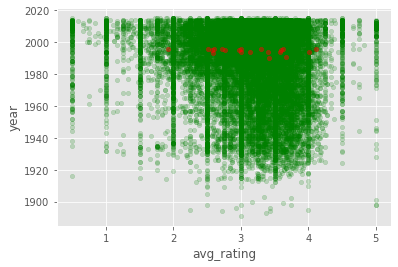

In [52]:
Data[["year"]] = Data[["year"]].astype(int)
ax = Data.plot(kind='scatter', x='avg_rating', y='year', color='green', alpha=0.20)
Data.iloc[recommended_movie[0]].plot(kind='scatter', x='avg_rating', y='year',\
                                                   color='red', alpha=0.5, ax=ax)

As we can see from the above figure, the recommendation system actually recommends the movies within similar years. This might  happend due to the similar types of movies within similar years.